In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
rng = np.random.default_rng(seed=42)

In [4]:
centers = np.array([
    [0.0, 0.0],     # class 0 center
    [3.0, 0.0],     # class 1 center
    [1.5, 2.5],     # class 2 center
])

In [21]:
points = []
labels = []
num_points = 100

for cls, center in enumerate(centers):
	pts = rng.normal(loc=center, scale=0.5, size=(num_points, len(center)))
	lbs = np.full(num_points, cls)
	points.append(pts)
	labels.append(lbs)


In [22]:
print(points)

[array([[ 0.1093443 ,  0.43571439],
       [ 0.11179777,  0.33945678],
       [ 0.03378953,  0.1445597 ],
       [ 0.31564411, -0.72857791],
       [-0.15983561, -0.23518633],
       [-0.31943892, -0.13757113],
       [ 0.74747066, -0.43291556],
       [ 0.48413918, -0.84143489],
       [-0.16744251,  0.08137653],
       [ 0.29311117,  0.35561329],
       [ 0.39667362, -0.17436254],
       [-0.2311759 ,  0.42898794],
       [-0.09565216, -0.63784316],
       [-0.56664361, -0.45972614],
       [ 0.24858037,  0.07121287],
       [ 0.34524268, -0.21362632],
       [ 0.07926985,  0.3127952 ],
       [-0.15467327,  0.22838762],
       [-0.33096297, -0.18152692],
       [-0.19086895, -0.59791982],
       [ 0.24348624, -0.23470117],
       [ 0.00624706,  0.24037333],
       [ 0.22326559,  0.33269255],
       [-0.04924274, -0.21164916],
       [-0.03985911, -0.84366722],
       [-0.72355624, -0.66134981],
       [-0.49862341,  0.19988711],
       [-0.45273953, -0.18908128],
       [ 0.64961415

In [23]:
X = np.vstack(points)   # shape (15, 2)
y = np.concatenate(labels)  # shape (15,)

In [24]:
print("X =", X)
print("y =", y)
print("X shape:", X.shape)
print("y shape:", y.shape)

X = [[ 1.09344298e-01  4.35714389e-01]
 [ 1.11797774e-01  3.39456782e-01]
 [ 3.37895347e-02  1.44559699e-01]
 [ 3.15644113e-01 -7.28577910e-01]
 [-1.59835608e-01 -2.35186327e-01]
 [-3.19438924e-01 -1.37571126e-01]
 [ 7.47470656e-01 -4.32915558e-01]
 [ 4.84139177e-01 -8.41434886e-01]
 [-1.67442515e-01  8.13765326e-02]
 [ 2.93111166e-01  3.55613290e-01]
 [ 3.96673618e-01 -1.74362536e-01]
 [-2.31175896e-01  4.28987941e-01]
 [-9.56521624e-02 -6.37843162e-01]
 [-5.66643607e-01 -4.59726143e-01]
 [ 2.48580372e-01  7.12128680e-02]
 [ 3.45242677e-01 -2.13626323e-01]
 [ 7.92698455e-02  3.12795197e-01]
 [-1.54673270e-01  2.28387619e-01]
 [-3.30962971e-01 -1.81526923e-01]
 [-1.90868947e-01 -5.97919823e-01]
 [ 2.43486240e-01 -2.34701170e-01]
 [ 6.24705936e-03  2.40373329e-01]
 [ 2.23265588e-01  3.32692554e-01]
 [-4.92427423e-02 -2.11649156e-01]
 [-3.98591055e-02 -8.43667217e-01]
 [-7.23556236e-01 -6.61349806e-01]
 [-4.98623414e-01  1.99887113e-01]
 [-4.52739528e-01 -1.89081277e-01]
 [ 6.49614149e-0

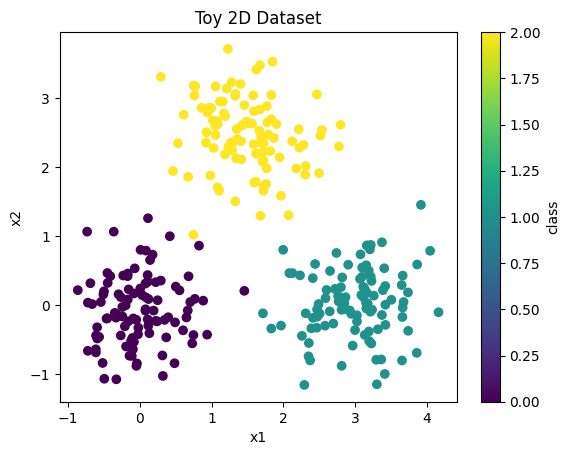

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Toy 2D Dataset")
plt.colorbar(label="class")
plt.show()

In [26]:
X_t = torch.tensor(X, dtype=torch.float32)

In [27]:
print(X_t)
print("X_t shape:", X_t.shape)
print("X_t dtype:", X_t.dtype)

tensor([[ 1.0934e-01,  4.3571e-01],
        [ 1.1180e-01,  3.3946e-01],
        [ 3.3790e-02,  1.4456e-01],
        [ 3.1564e-01, -7.2858e-01],
        [-1.5984e-01, -2.3519e-01],
        [-3.1944e-01, -1.3757e-01],
        [ 7.4747e-01, -4.3292e-01],
        [ 4.8414e-01, -8.4143e-01],
        [-1.6744e-01,  8.1377e-02],
        [ 2.9311e-01,  3.5561e-01],
        [ 3.9667e-01, -1.7436e-01],
        [-2.3118e-01,  4.2899e-01],
        [-9.5652e-02, -6.3784e-01],
        [-5.6664e-01, -4.5973e-01],
        [ 2.4858e-01,  7.1213e-02],
        [ 3.4524e-01, -2.1363e-01],
        [ 7.9270e-02,  3.1280e-01],
        [-1.5467e-01,  2.2839e-01],
        [-3.3096e-01, -1.8153e-01],
        [-1.9087e-01, -5.9792e-01],
        [ 2.4349e-01, -2.3470e-01],
        [ 6.2471e-03,  2.4037e-01],
        [ 2.2327e-01,  3.3269e-01],
        [-4.9243e-02, -2.1165e-01],
        [-3.9859e-02, -8.4367e-01],
        [-7.2356e-01, -6.6135e-01],
        [-4.9862e-01,  1.9989e-01],
        [-4.5274e-01, -1.890

In [28]:
y_t = torch.tensor(y, dtype=torch.long)

In [29]:
print(y_t)
print("y_t shape:", y_t.shape)
print("y_t dtype:", y_t.dtype)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [30]:
N = X.shape[0]
perm = rng.permutation(np.arange(N))
split = int(0.8 * N)
train_idx = perm[:split]
test_idx = perm[split:]

In [31]:
print("Train idx:", train_idx)
print("Test idx:", test_idx)

Train idx: [ 53 111  32 194  80  69 246 164  98 256 168  30 102 157 248 199  84 207
 127 261  23 198 270 143  63 150 155  86 145 124 202 153 154   7 255 274
 241  77 180  48  19 109 299 286  79  60  20  16  81  41 231  70  39 105
 292  83  33 239 232 278   4 230 281  93 179 181 116 184  85 190  57  67
 100 253 118 130 285 252  22 208 146  44 298  36 129 233 173  43   5 247
 174  66 268  21 200 236 234 264 209  96 135 160 284 125 122  58 287 185
  56 165 221 265 101  40 152  37 175  74  65 216  45  50 254 279 134   9
  90  26 172 138 158 225 220 148  54 103 227 189 144 217 187 104 280 296
  11 260 204   3 269  59 131  68 167  15 107 110 133 169  61 240 121  64
 276 128  92  47  29 250 162  42 171 203   2  17  49 142 119 156 213 275
 295 163 242 201 237 197 108  89 196 229 193 176  97 126  91  82 266 226
  28  13 297 183  75 283 290  87 106 282 206   0  25 123 258   6  14 235
 211 271 132  88 112 272 238 289 210 223  71  52 120 249   8  10 151 182
  18 140 195  73 170 212]
Test idx: [136

In [33]:
X_train = X_t[train_idx]
y_train = y_t[train_idx]

X_test = X_t[test_idx]
y_test = y_t[test_idx]